# Análise de Classificação de Sentimentos com Dados não Supervisionados

- A missão nesse estudo é aprender novas abordagens na preparação de dados para trabalhos com modelos estatísticos.
<br>
# Objetivos:🎯
- Classificar os dados disponíveis nos 5 grupos alvos: <b>O</b>penness, <b>C</b>onscientiousness, <b>E</b>xtraversion, <b>A</b>greeableness e <b>N</b>euroticism.

<br>

<b> Responder:</b>

<br>

- Qual é o maior grupo identificado na classificação? 
- Qual é a maior média de resultado identificada entre os grupos?
- Ao analisar apenas 20% do dataset, houve diferenças discrepantes nos resultados?
- E analisando 15%, houve novas diferenças?

<br>

# Fontes e Outras Referências:
- O <b>dataset desta análise</b> é muito conhecido e pode ser melhor compreendido aqui:https://www.kaggle.com/tunguz/big-five-personality-test  
- Um pouco mais sobre a metodologia do <b> Teste Big Five </b> pode ser melhor compreendido aqui: https://dotlib.com/blog/big-five-conheca-o-teste-comportamental-que-decifra-personalidades

# 1. Explorando e Tratando os Dados

In [1]:
# Imports necessários limitando a visualização de colunas em 150

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150

In [2]:
# Carregando dataset validando a sepração com o tipo "tap" = Espaço
data = pd.read_csv('data_final.csv', sep = ',')


In [3]:
# Visualizando dataset
data.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [4]:
# A base em questão dispõe de muitas informações que não serão necessárias para nosso modelo de clusterização, dados como:
# nacionalidade, tempo de resposta e datas, por exemplo, podem ser dropadas do dataset

data.drop(data.columns[50:110], axis=1, inplace=True)
print('Drop ok')

Drop ok


In [5]:
# Visualizando dataset sem as colunas removidas
data.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [6]:
# Vamos entender um pouco da distribuição das informações atuais

pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00,149997.00
mean,2.64,2.82,3.29,3.17,3.25,2.48,2.78,3.44,2.97,3.58,3.25,3.24,3.83,2.69,2.82,2.83,3.05,2.66,3.10,2.75,2.27,3.82,2.34,3.91,2.30,3.73,2.21,3.67,3.76,3.56,3.26,2.97,3.95,2.65,2.56,2.87,3.66,2.51,3.14,3.55,3.65,2.12,3.99,2.08,3.76,1.92,3.98,3.15,4.07,3.91
std,1.25,1.32,1.21,1.23,1.28,1.24,1.39,1.27,1.34,1.30,1.34,1.22,1.16,1.25,1.27,1.32,1.28,1.33,1.29,1.32,1.34,1.13,1.30,1.13,1.17,1.22,1.11,1.09,1.16,1.07,1.18,1.38,1.04,1.25,1.27,1.41,1.13,1.14,1.28,1.04,1.14,1.11,1.10,1.09,0.99,1.12,1.00,1.24,1.05,1.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,2.00,3.00,4.00,3.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,5.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,3.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,4.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [7]:
# É importante ressaltar que as siglas das colunas são abreviações dos tipo de perguntas do teste, e ao analisar nossos valores
# minímos, observamos o valor 0, o que implica em algum tipo de erro que não podemos deixar ir para nosso treinamento do modelo

data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
# levando em consideração a dimensão geral da base em relação ao numero de dados zerados, podemos filtrar os dados zerados da
# da nossa base que será usada para o treinamento do nosso modelo

data = data[(data > 0.00).all(axis=1)]

In [9]:
# Como todas as perguntas apresentaram valores 0, vamos verificar uma delas para confirmar a remoção dos valores zerados

data["EXT1"].value_counts()

EXT1
3.00    37419
1.00    31387
2.00    25500
4.00    24445
5.00     8931
Name: count, dtype: int64

# 2. Definindo o Melhor Número de Clusters com Yellow Brick

In [10]:
# Instalando o Yellow Brick
!pip install yellowbrick

In [11]:
# + Imports necessários

import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [12]:
# definindo variáveis de uso

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [13]:
# Definindo amostras aleatórias para teste

data_sample = data.sample(n=5000, random_state=1)

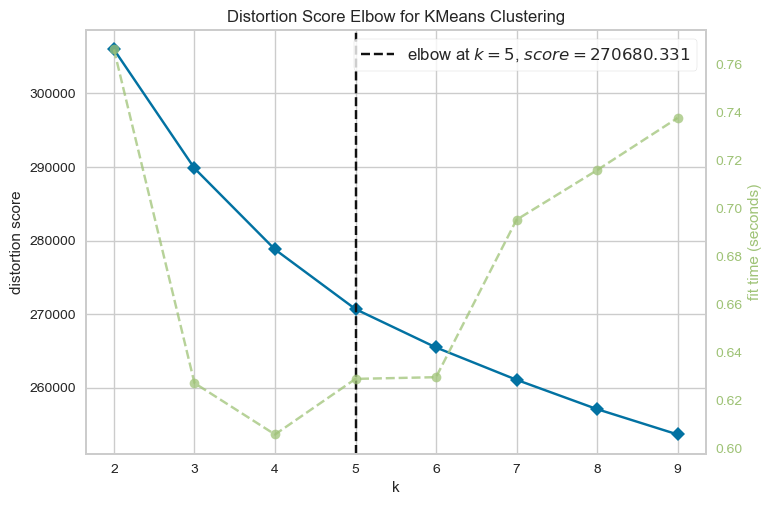

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# A análise gerada nos da uma sugestão do numero de clusters a definir. No entanto, sabemos através da interpretação da
# necessidade de negócio, que o obejtivo é classicar os dados em 5 grupos de sentimentos, logo já temos definido nosso numero
# de clusters em nossa pergunta

visualizer.fit(data_sample)
visualizer.poof()

# 3. Iniciando Ajustes Para Classificar

In [15]:
# Gerando Instancias 

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

In [16]:
# Definindo rótulos do nosso clusters

predicoes = k_fit.labels_
data['Clusters'] = predicoes

In [17]:
# visualizando dataset

data.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,0
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,4
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,2
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,0


Clusters
1    28722
0    26022
4    25913
3    25419
2    21606
Name: count, dtype: int64

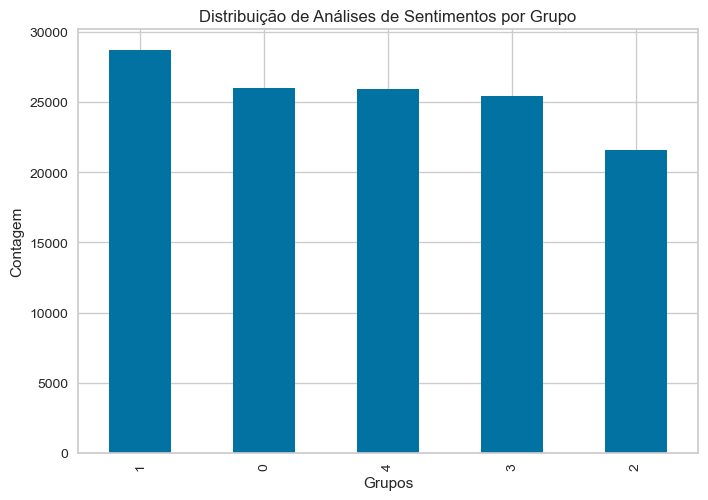

In [18]:
# Qual é distribuição de resultados por grupo?

data["Clusters"].value_counts().plot(kind='bar')

plt.xlabel('Grupos')
plt.ylabel('Contagem')
plt.title('Distribuição de Análises de Sentimentos por Grupo');
data["Clusters"].value_counts()

In [19]:
# Vamos agrupar os resultados por grupo para gerar uma análise individual por grupo

col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [20]:
# Somando resultados por grupos definidos

data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

In [21]:
# Vamos entender a distribuição da média de resultados por grupo

data_soma.groupby('clusters').mean()


,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.10,2.43,3.23,3.10,3.33
1,3.09,3.42,3.30,3.21,3.37
2,3.04,2.66,2.98,3.01,3.22
3,2.99,3.65,3.16,3.17,3.25
4,3.08,2.97,3.19,3.16,3.25


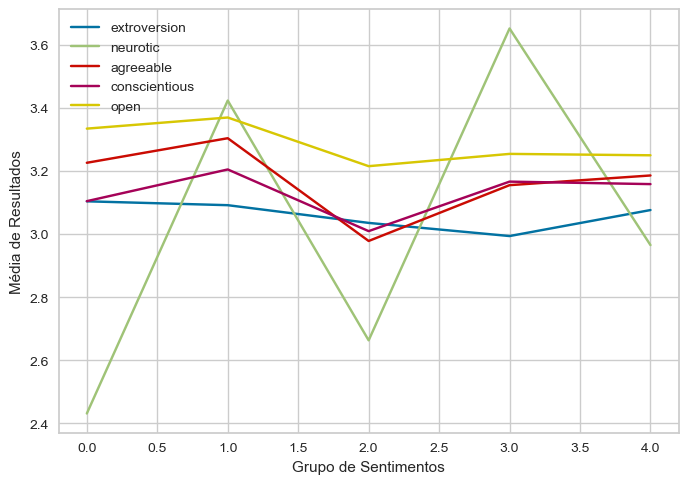

In [22]:
# Entendendo o comportamento de cada sentimento em relação aos outros

data_soma.groupby('clusters').mean().plot(kind="line", xlabel="Grupo de Sentimentos", ylabel="Média de Resultados");

In [23]:
data_clusters = data_soma.groupby('clusters').mean()

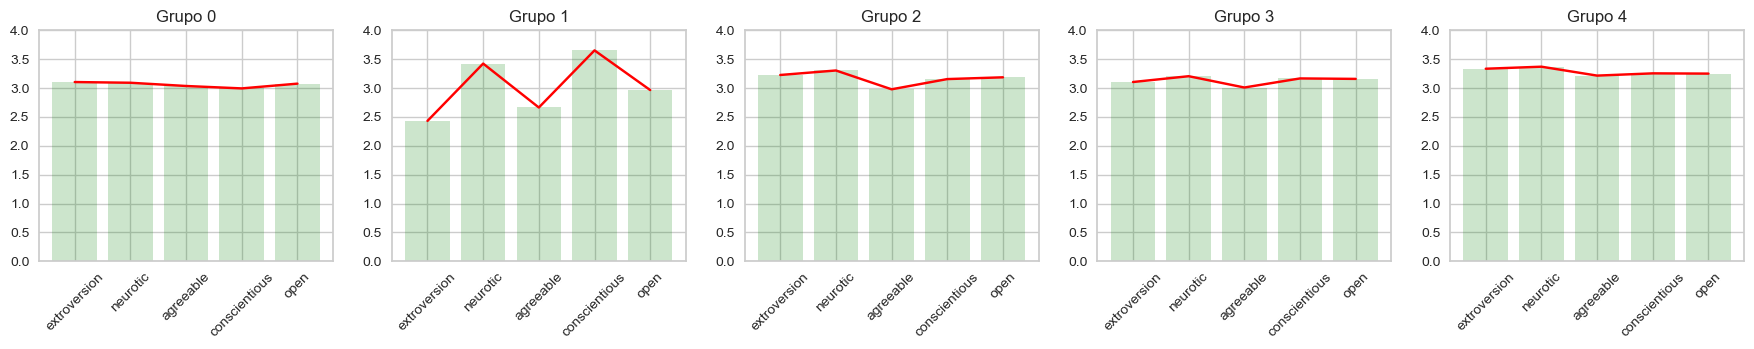

In [24]:
# Para facilitar visualização individual dos grupos sentimentos 

plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

# 4. Resultados Alcançados🚀

- <b> O que eu consegui descobrir?</b>💡
<br>

- <b>1°</b> O grupo com mais classificações fica para as pessoas do grupo 4 <b>Conscientious</b>
<br>
- <b>2°</b> A maior média de resultado obtido fica com o grupo <b>Agreeable</b> com o valor de <b>3,65</b> em <b>Neurotic</b>
<br>
- <b>3°</b> Eu analisei este conjunto de dados 3 vezes, a primeira vez com todas as linhas do dataset,na segunda com 20% aproximadamente do total de dados. E embora os resultados da primeira análise tenha se mantido em boa parte da variáveis, a diferença entre a primeira para a segunda análise foi o total de observações por tipo de grupo, onde na primeira vez, o grupo 2 <b>Agreeable</b> recebeu mais observações e nesta segunda análise o grupo 0  <b>Extroversion</b> ficou a frente, embora as média tenha tido uma variação, o grupo 1 se manteve com a maior média registrada. Porém agora com 15% do dataset, o grupo <b>Conscientious</b> recebeu mais observações com a maior média de resultados ficando com o grupo 2 <b>Agreeable</b> com o valor de <b>3,65</b> em <b>Neurotic</b>.
<br>

- <b>Objetivo Princial:</b> A minha proposta era aperfeiçoar a apresentação de informações através de visualizações funcionais e também de agregar novos conhecimentos, destaco aqui o uso do <b>Yellow Bricks</b> para apoiar na escolha do numero recomendado de clusters. E também desenvolver uma noção do comportamento dos dados com determinadas quantidades de amostras e como isso muda o resultado obtido.
<br>

- <b>Próximos Passos:</b> O próximo passo a executar aqui poderia ser a adequação dessa coleta de dados a um cenário de uma empresa onde informações de colaboradores pudessem ser coletadas a fim de medir o índice retenção destes em suas respectivas funções, satisfação no ambiente de trabalho, entre outras abordagens até mesmo em outro segmento como o varejo, por exemplo onde podemos mapear o sentimento de clientes dentro de estabelcimentos a fim de proporcionar a melhor experiência possível.